Importing libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

Read csv file

In [2]:
avocado_data = pd.read_csv('avocado.csv')

# Data Exploration

In [3]:
# Display the first few rows of the dataset
print(avocado_data.head())

   Unnamed: 0        Date  AveragePrice  Total Volume     4046       4225  \
0           0  2015-12-27          1.33      64236.62  1036.74   54454.85   
1           1  2015-12-20          1.35      54876.98   674.28   44638.81   
2           2  2015-12-13          0.93     118220.22   794.70  109149.67   
3           3  2015-12-06          1.08      78992.15  1132.00   71976.41   
4           4  2015-11-29          1.28      51039.60   941.48   43838.39   

     4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
0   48.16     8696.87     8603.62       93.25          0.0  conventional   
1   58.33     9505.56     9408.07       97.49          0.0  conventional   
2  130.50     8145.35     8042.21      103.14          0.0  conventional   
3   72.58     5811.16     5677.40      133.76          0.0  conventional   
4   75.78     6183.95     5986.26      197.69          0.0  conventional   

   year  region  
0  2015  Albany  
1  2015  Albany  
2  2015  Albany  
3  2015 

In [4]:
# Summary statistics of the dataset
print(avocado_data.describe())

         Unnamed: 0  AveragePrice  Total Volume          4046          4225  \
count  18249.000000  18249.000000  1.824900e+04  1.824900e+04  1.824900e+04   
mean      24.232232      1.405978  8.506440e+05  2.930084e+05  2.951546e+05   
std       15.481045      0.402677  3.453545e+06  1.264989e+06  1.204120e+06   
min        0.000000      0.440000  8.456000e+01  0.000000e+00  0.000000e+00   
25%       10.000000      1.100000  1.083858e+04  8.540700e+02  3.008780e+03   
50%       24.000000      1.370000  1.073768e+05  8.645300e+03  2.906102e+04   
75%       38.000000      1.660000  4.329623e+05  1.110202e+05  1.502069e+05   
max       52.000000      3.250000  6.250565e+07  2.274362e+07  2.047057e+07   

               4770    Total Bags    Small Bags    Large Bags    XLarge Bags  \
count  1.824900e+04  1.824900e+04  1.824900e+04  1.824900e+04   18249.000000   
mean   2.283974e+04  2.396392e+05  1.821947e+05  5.433809e+04    3106.426507   
std    1.074641e+05  9.862424e+05  7.461785e+05 

In [5]:
# Information about the dataset
print(avocado_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB
None


In [6]:
avocado_data['Date']=pd.to_datetime(avocado_data['Date'])

*Data analysis*

In [7]:
print(avocado_data.isnull().sum())

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64


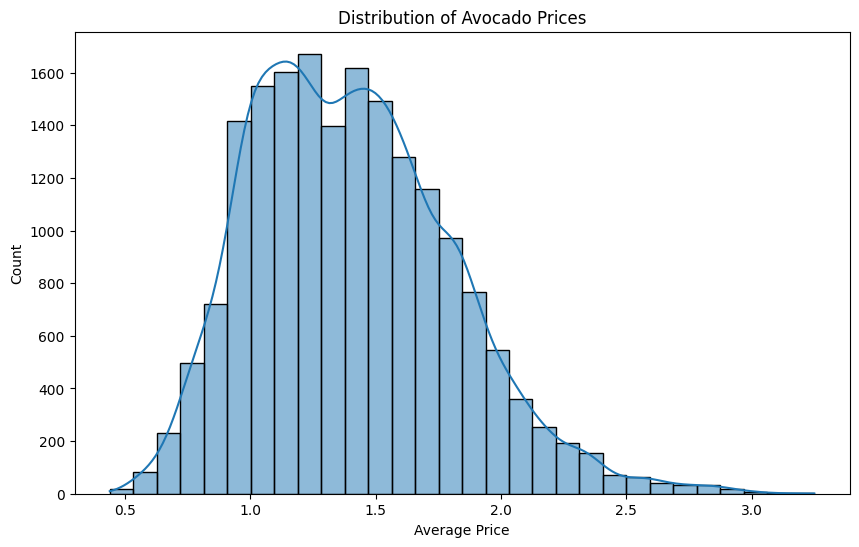

In [8]:
plt.figure(figsize=(10, 6))
sns.histplot(avocado_data['AveragePrice'], bins=30, kde=True)
plt.title('Distribution of Avocado Prices')
plt.xlabel('Average Price')
plt.show()

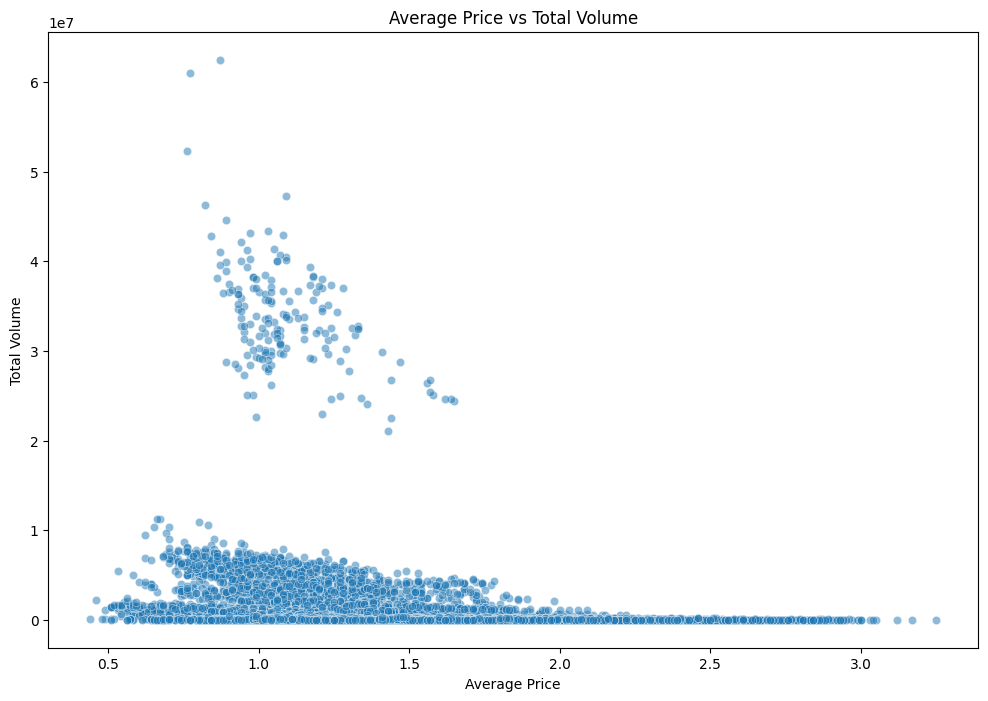

In [9]:
# Relationship between average price and total volume
plt.figure(figsize=(12, 8))
sns.scatterplot(x='AveragePrice', y='Total Volume', data=avocado_data, alpha=0.5)
plt.title('Average Price vs Total Volume')
plt.xlabel('Average Price')
plt.ylabel('Total Volume')
plt.show()

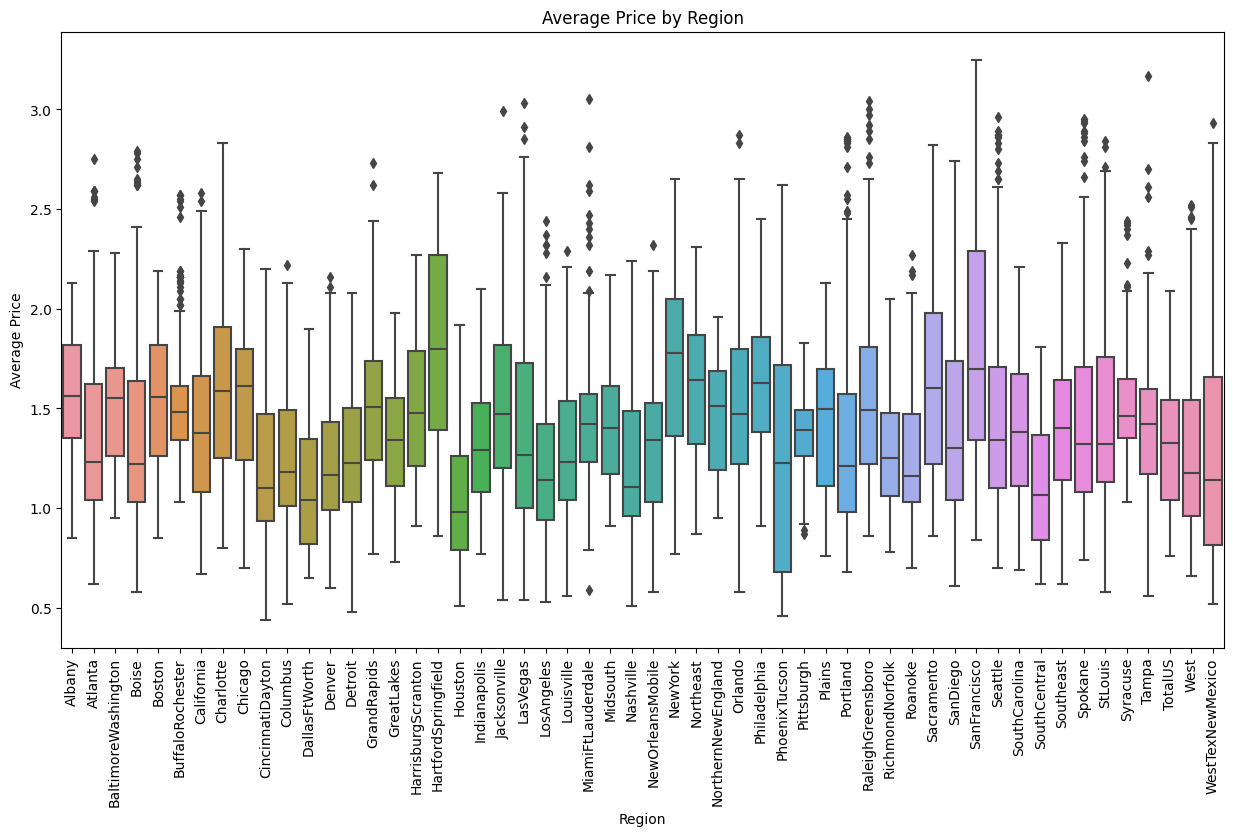

In [10]:
# Box plot of average price by region
plt.figure(figsize=(15, 8))
sns.boxplot(x='region', y='AveragePrice', data=avocado_data)
plt.title('Average Price by Region')
plt.xlabel('Region')
plt.ylabel('Average Price')
plt.xticks(rotation=90)
plt.show()

Visualization

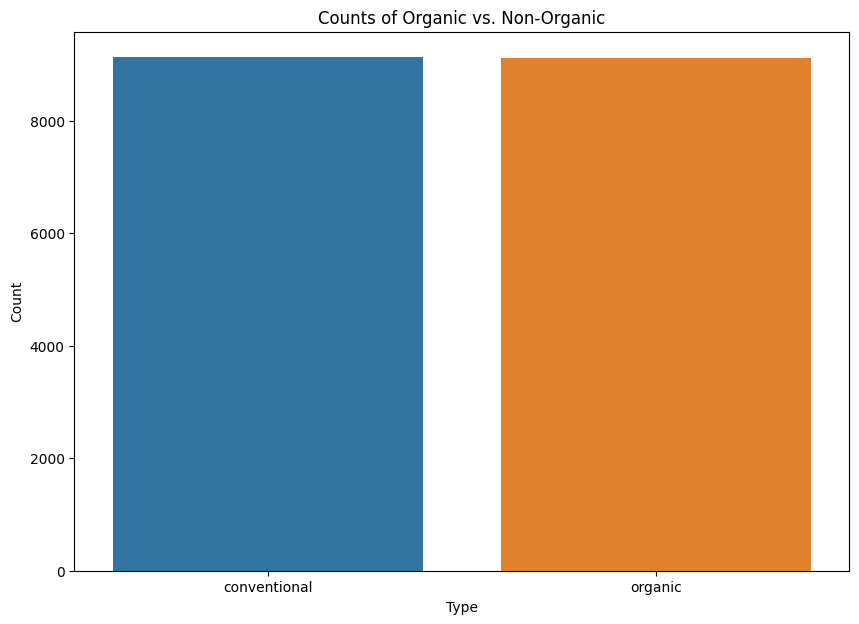

In [11]:
# Counts of Organic vs. Non-Organic
plt.figure(figsize=(10, 7))
sns.countplot(x='type', data=avocado_data)
plt.title('Counts of Organic vs. Non-Organic')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

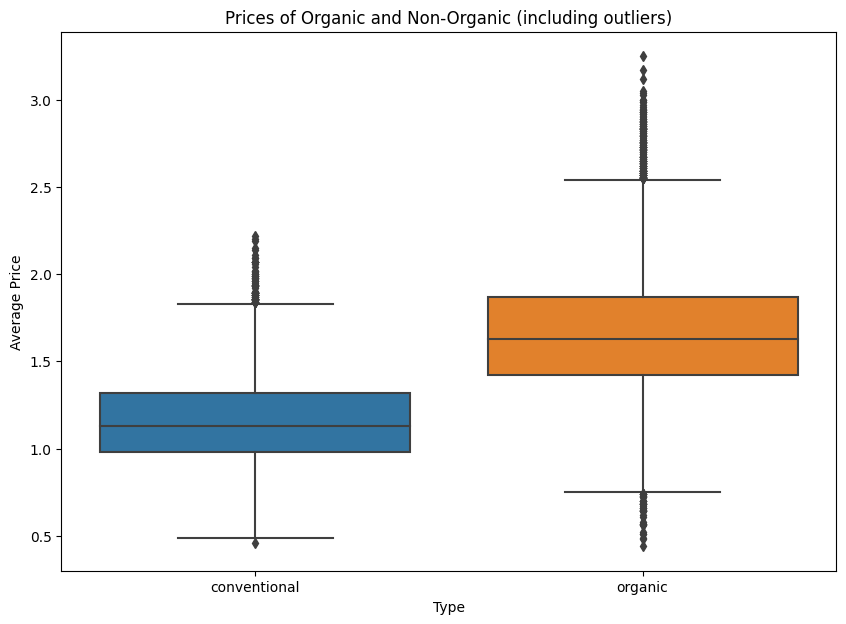

In [12]:
# Prices of Organic and Non-Organic including outliers (boxplot)
plt.figure(figsize=(10, 7))
sns.boxplot(x='type', y='AveragePrice', data=avocado_data)
plt.title('Prices of Organic and Non-Organic (including outliers)')
plt.xlabel('Type')
plt.ylabel('Average Price')
plt.show()


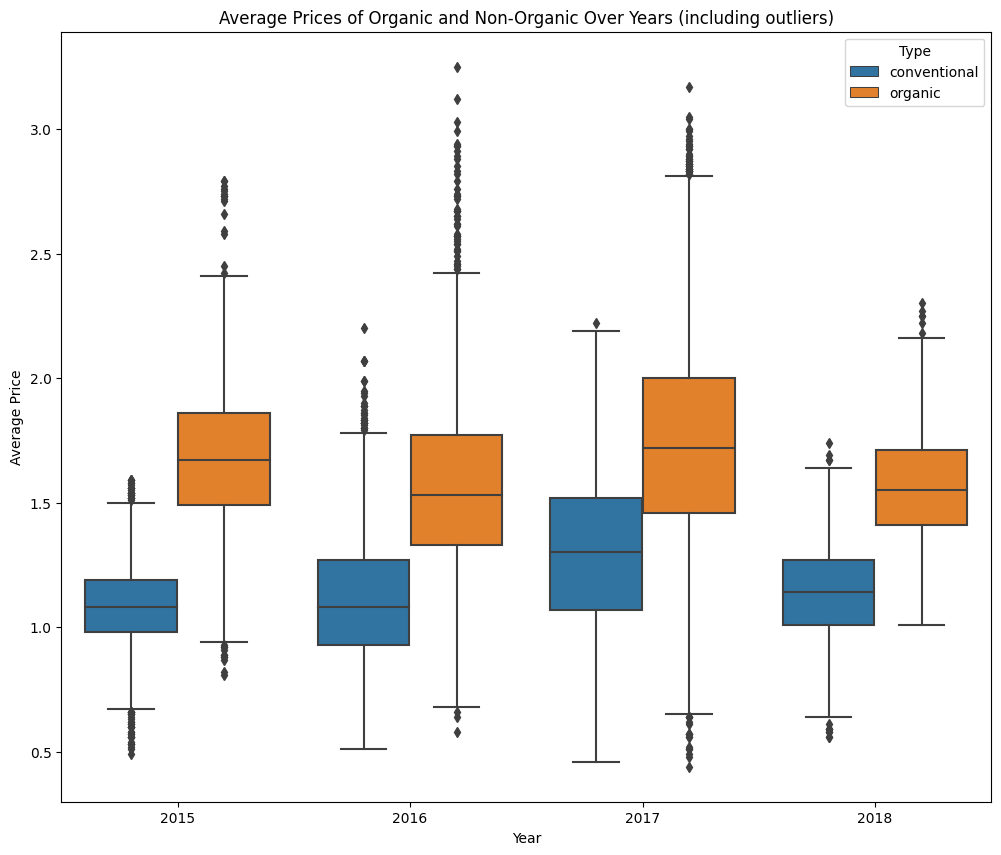

In [13]:
# Average prices of Organic and Non-Organic over years including outliers (boxplot)
plt.figure(figsize=(12, 10))
sns.boxplot(x='year', y='AveragePrice', hue='type', data=avocado_data)
plt.title('Average Prices of Organic and Non-Organic Over Years (including outliers)')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.legend(title='Type')
plt.show()

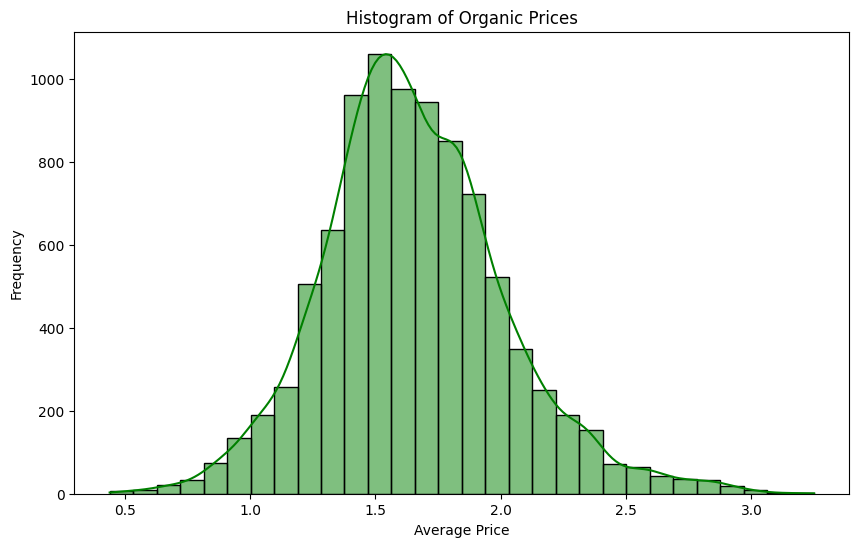

In [14]:
# Histogram of Organic Prices
organic_prices = avocado_data[avocado_data['type'] == 'organic']['AveragePrice']
plt.figure(figsize=(10, 6))
sns.histplot(organic_prices, bins=30, kde=True, color='green')
plt.title('Histogram of Organic Prices')
plt.xlabel('Average Price')
plt.ylabel('Frequency')
plt.show()

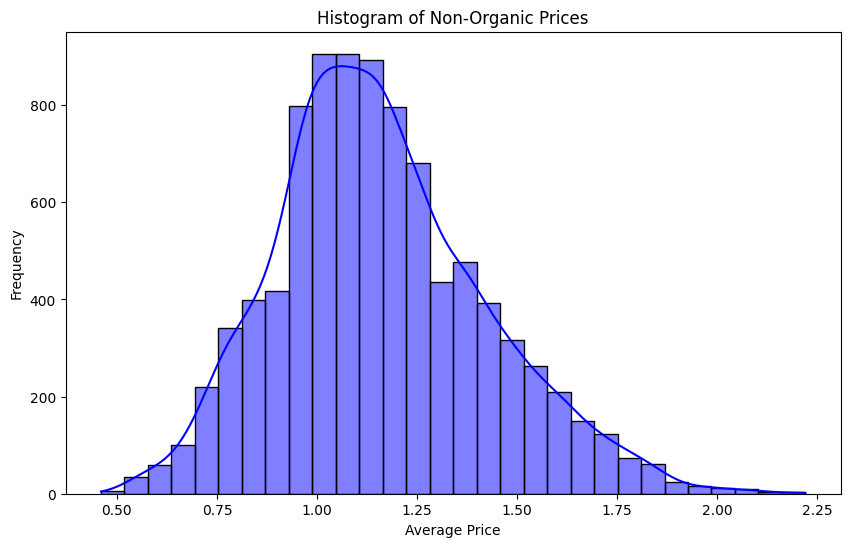

In [15]:
# Histogram of Non-Organic Prices
non_organic_prices = avocado_data[avocado_data['type'] == 'conventional']['AveragePrice']
plt.figure(figsize=(10, 6))
sns.histplot(non_organic_prices, bins=30, kde=True, color='blue')
plt.title('Histogram of Non-Organic Prices')
plt.xlabel('Average Price')
plt.ylabel('Frequency')
plt.show()

# Feature Engineering to convert type categorical data into numeric value

In [16]:
#Feature Engineering to convert categorical type of avocado into numeric
le = LabelEncoder()
avocado_data['type'] = le.fit_transform(avocado_data['type'])

# Split Data

In [17]:
#Split into Feature Matrix and Target Vector
#X = avocado_data[['AveragePrice', 'Total Volume']]
X = avocado_data[['AveragePrice', 'Total Volume', '4046', '4225', '4770']]
y = avocado_data['type']
print(X)
print(y)

       AveragePrice  Total Volume     4046       4225    4770
0              1.33      64236.62  1036.74   54454.85   48.16
1              1.35      54876.98   674.28   44638.81   58.33
2              0.93     118220.22   794.70  109149.67  130.50
3              1.08      78992.15  1132.00   71976.41   72.58
4              1.28      51039.60   941.48   43838.39   75.78
...             ...           ...      ...        ...     ...
18244          1.63      17074.83  2046.96    1529.20    0.00
18245          1.71      13888.04  1191.70    3431.50    0.00
18246          1.87      13766.76  1191.92    2452.79  727.94
18247          1.93      16205.22  1527.63    2981.04  727.01
18248          1.62      17489.58  2894.77    2356.13  224.53

[18249 rows x 5 columns]
0        0
1        0
2        0
3        0
4        0
        ..
18244    1
18245    1
18246    1
18247    1
18248    1
Name: type, Length: 18249, dtype: int64


In [18]:
#Split into train and test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (14599, 5)
Shape of y_train: (14599,)
Shape of X_test: (3650, 5)
Shape of y_test: (3650,)


# Data normalization

In [19]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Classification

Using Support Vector Machine (SVM) classifier.

In [20]:
svm_classifier = SVC(kernel='linear', C=100.0,gamma=0.01, random_state=42)
svm_classifier.fit(X_train_scaled, y_train)
y_pred = svm_classifier.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')

Accuracy: 0.9304
Confusion Matrix:
[[1626  194]
 [  60 1770]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.89      0.93      1820
           1       0.90      0.97      0.93      1830

    accuracy                           0.93      3650
   macro avg       0.93      0.93      0.93      3650
weighted avg       0.93      0.93      0.93      3650



In [21]:
avocado_data

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1,2018,WestTexNewMexico


Using grid search to find the best parameters

In [23]:
from sklearn.model_selection import GridSearchCV

# Defining the parameter values that should be searched
param_grid = {'C': [0.1, 1, 10, 100],
              'gamma': [1, 0.1, 0.01, 0.001],
              'kernel': ['linear', 'rbf']}

# Creating a GridSearch object
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=3, cv=5)

# Fitting the model using the grid search estimator. To try each combination of parameters
grid.fit(X_train_scaled, y_train)

# Best parameters.
print(grid.best_params_)
# Best grid estimator.
print(grid.best_estimator_)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.910 total time=   2.4s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.901 total time=   2.2s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.901 total time=   2.2s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.898 total time=   2.4s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.898 total time=   3.7s
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.902 total time=   2.8s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.899 total time=   2.7s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.893 total time=   2.7s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.891 total time=   3.4s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.892 total time=   4.0s
[CV 1/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.910 total time=   2.3s
[CV 2/5] END ...C=0.1, gamma=0.1, kernel=linear

Usinf the best parameters found in the training and evaluation

In [24]:
svm_classifier = SVC(kernel='rbf', C=100.0,gamma=1, random_state=42)
svm_classifier.fit(X_train_scaled, y_train)
y_pred = svm_classifier.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')

Accuracy: 0.9570
Confusion Matrix:
[[1730   90]
 [  67 1763]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.95      0.96      1820
           1       0.95      0.96      0.96      1830

    accuracy                           0.96      3650
   macro avg       0.96      0.96      0.96      3650
weighted avg       0.96      0.96      0.96      3650



# Regression looking for the best model

Some of the following code is based on this project: https://www.kaggle.com/code/anitha136/avocado-price-prediction

1. checking the average price by date, the prices have variations by date. Therefore it should be considered as a feature

<ipython-input-26-25cfb022f49c>:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  byDate=dfRegression.groupby('Date').mean()


Text(0.5, 1.0, 'Average Price')

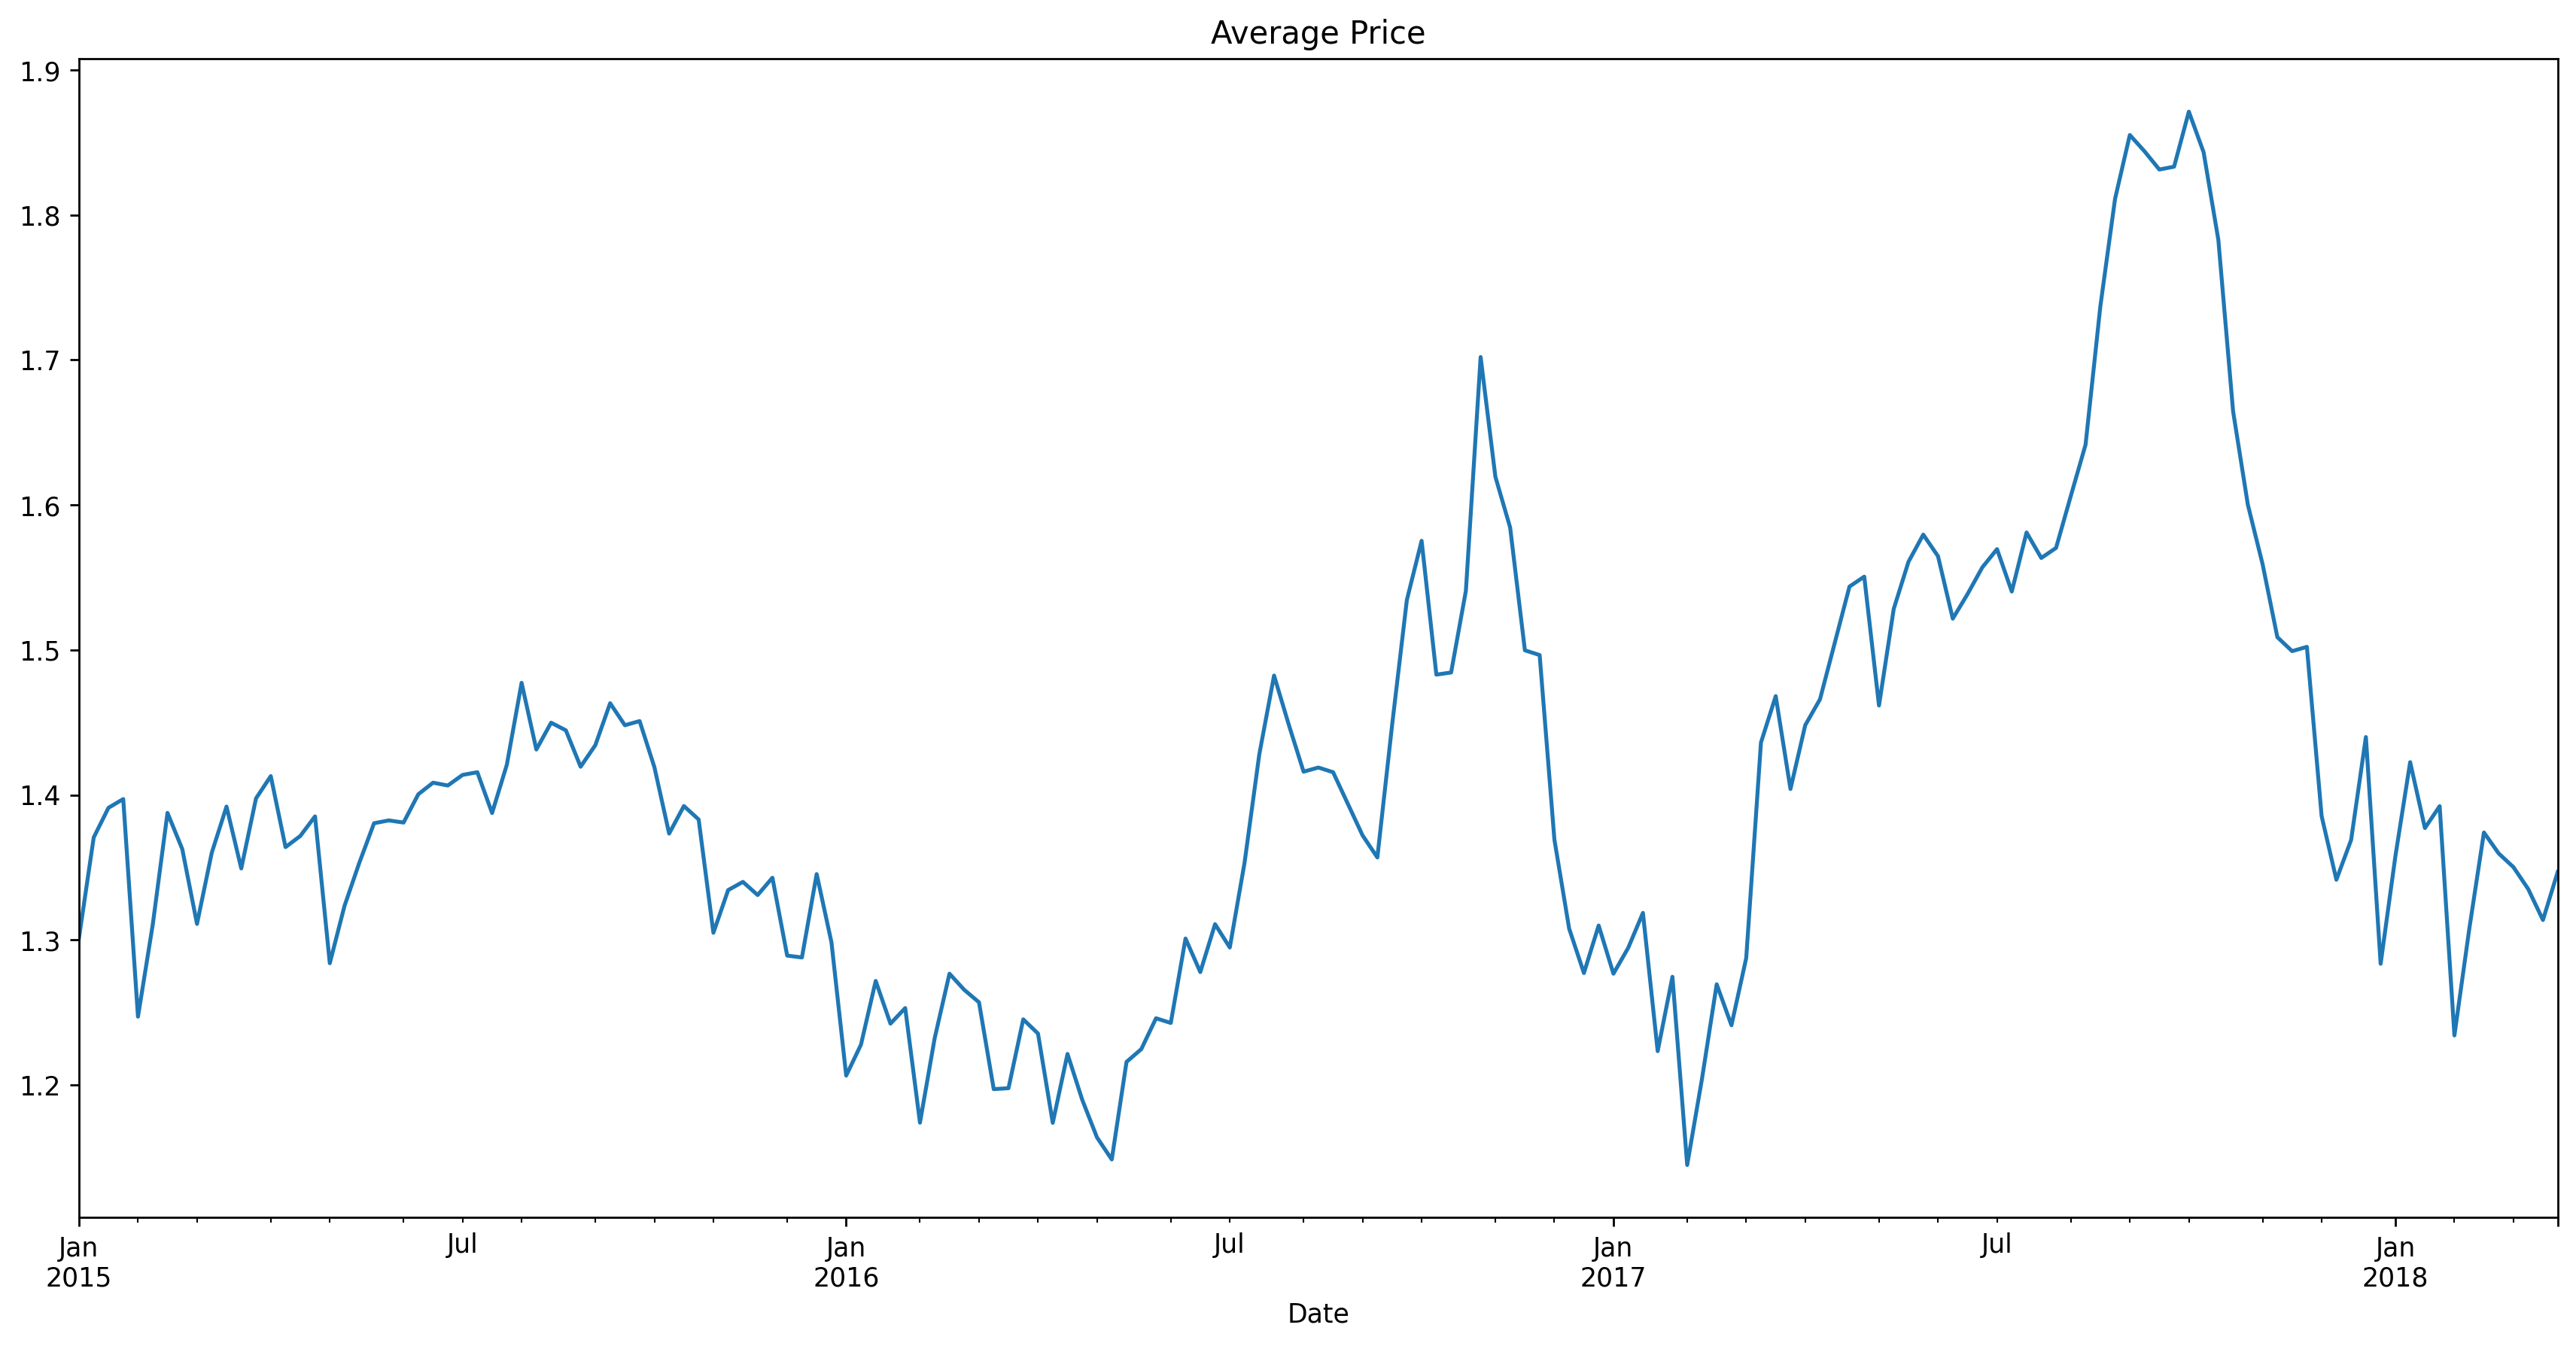

In [26]:
import matplotlib.pyplot as plt

# Copying the dataset to not fuck up the original and the treated one
dfRegression = avocado_data.copy()

byDate=dfRegression.groupby('Date').mean()
plt.figure(figsize=(17,8),dpi=250)
byDate['AveragePrice'].plot()
plt.title('Average Price')

In [27]:
# Splitting the date components into differents columns
dfRegression['Date']=pd.to_datetime(dfRegression['Date'])
dfRegression['Month']=dfRegression['Date'].apply(lambda x:x.month)
dfRegression['Day']=dfRegression['Date'].apply(lambda x:x.day)
dfRegression.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,Albany,12,27
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,Albany,12,20
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,Albany,12,13
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,Albany,12,6
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,Albany,11,29


2. Analyzing the price variation by month. it seems like from February to November the price rises. Then they fall down until February, we also will consider this value as a feature

<ipython-input-28-ba31aad039cc>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  byMonth = dfRegression.groupby("Month").mean()


Text(0.5, 1.0, 'Average Price Per Month')

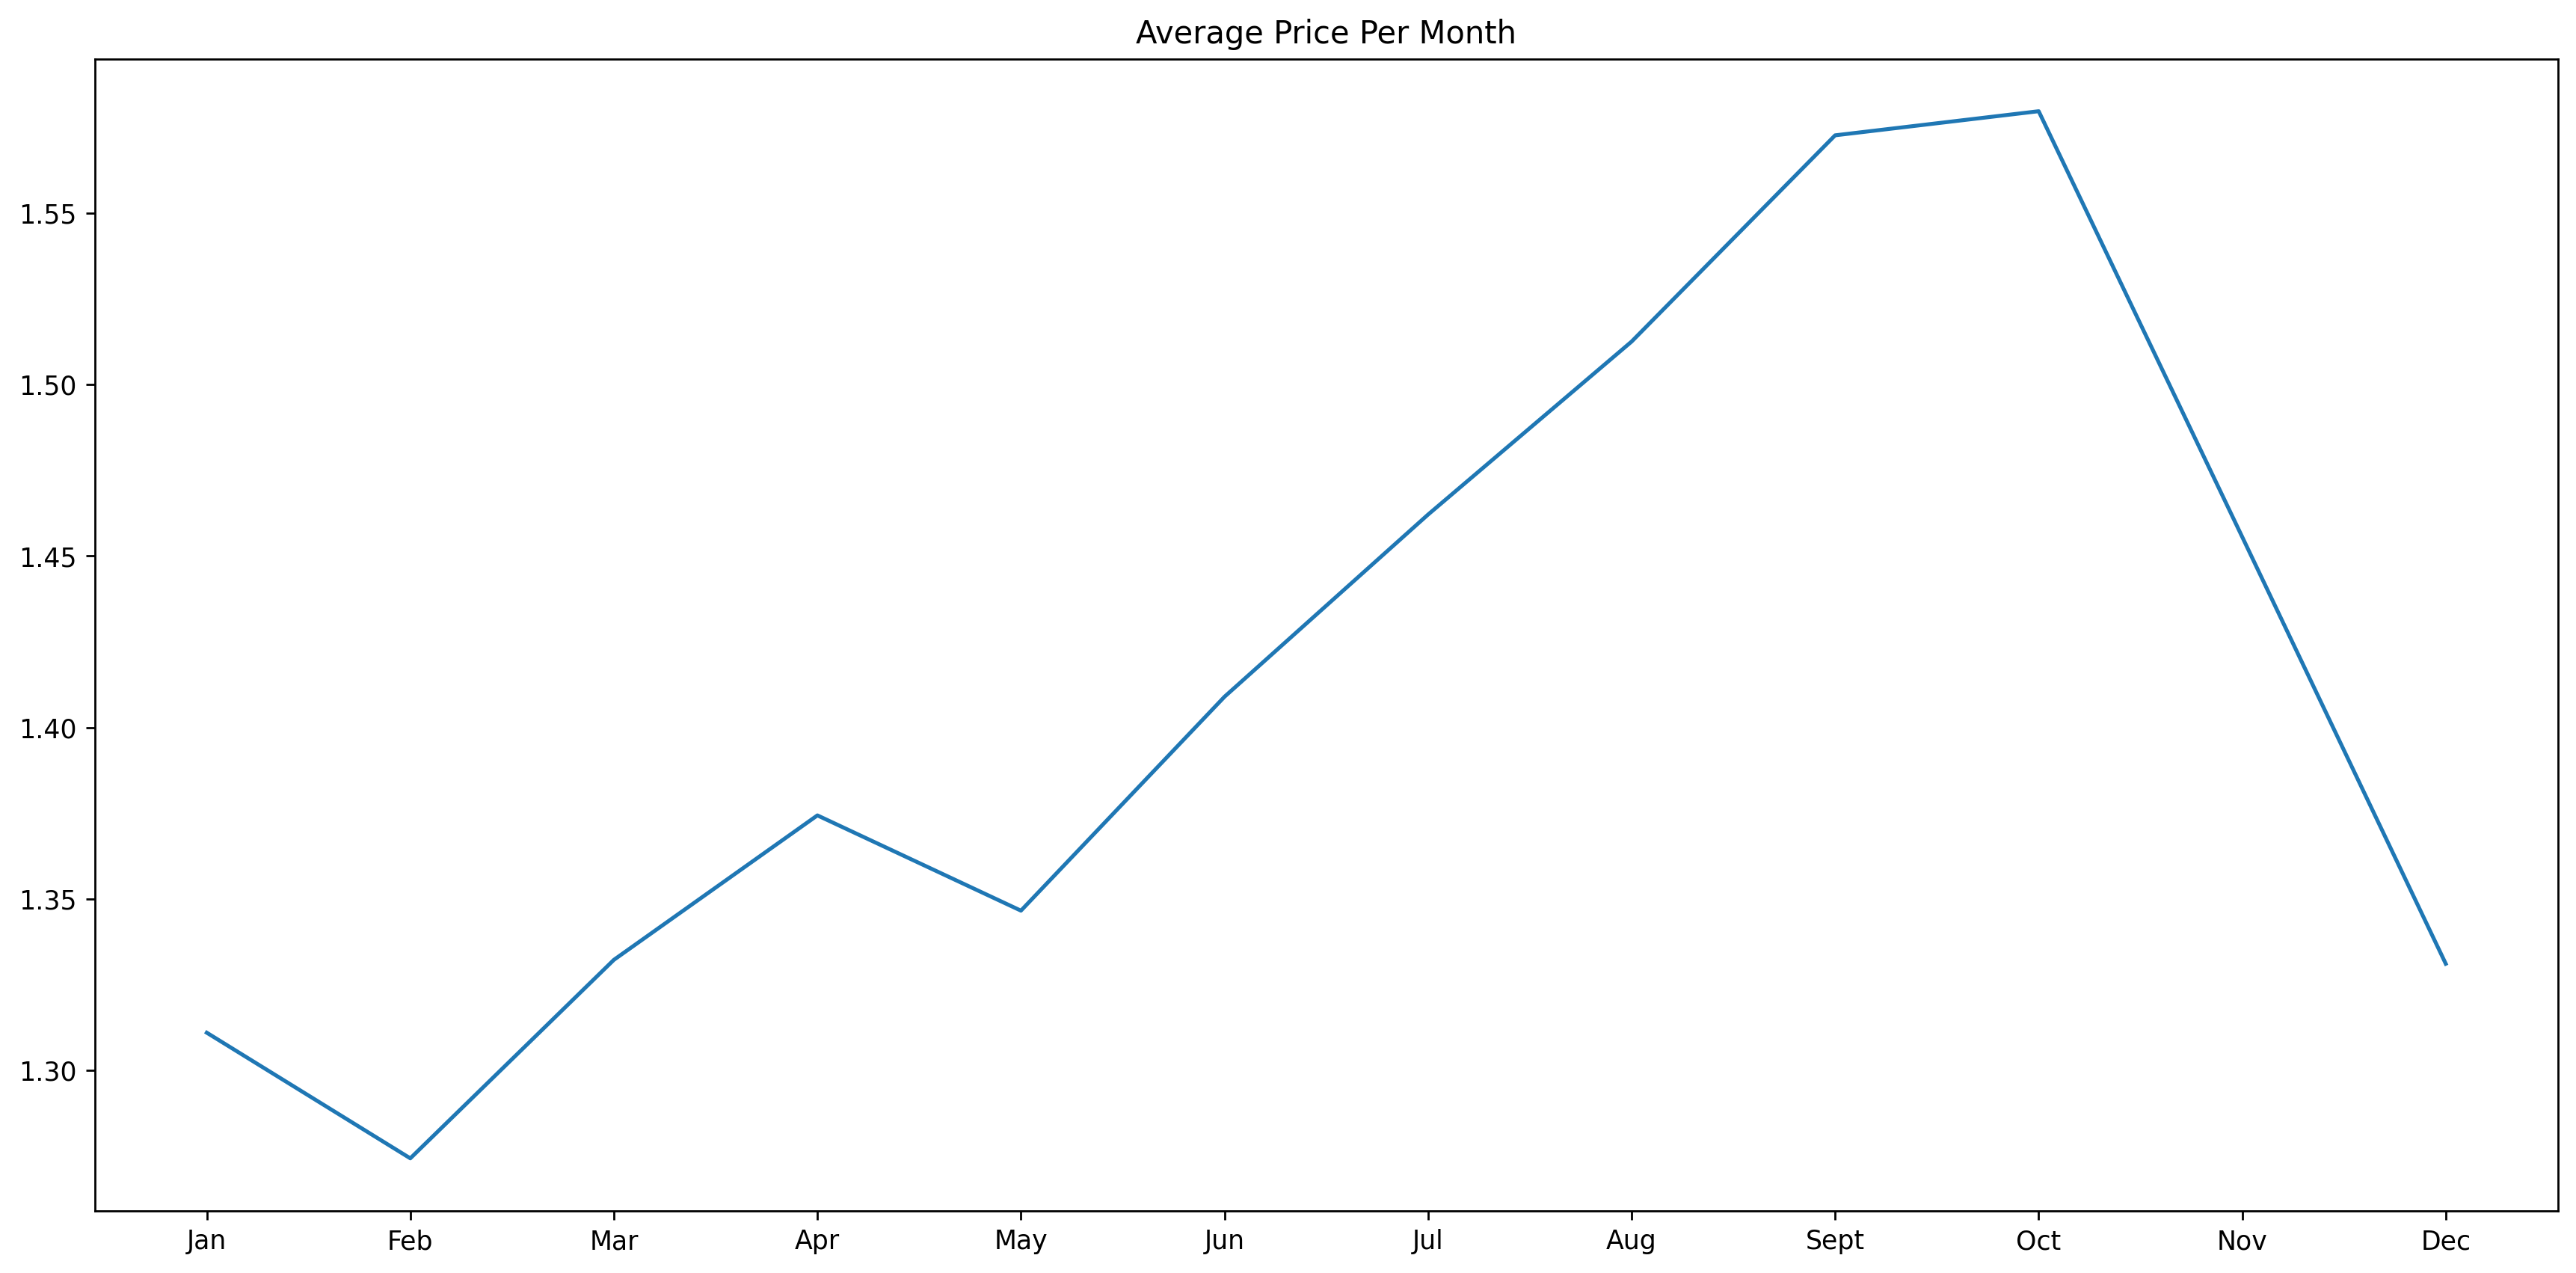

In [28]:
byMonth = dfRegression.groupby("Month").mean()
plt.figure(figsize=(17,8),dpi=250)
plt.plot(["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sept","Oct","Nov","Dec"],byMonth['AveragePrice'])
plt.title('Average Price Per Month')

3. Price Analysis by region.

    Due to prices varies per Region it should be also considered as a feature.

<ipython-input-29-fba7bd806aa5>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  byRegion=dfRegression.groupby('region').mean()


Text(0.5, 1.0, 'Average Price According to Region')

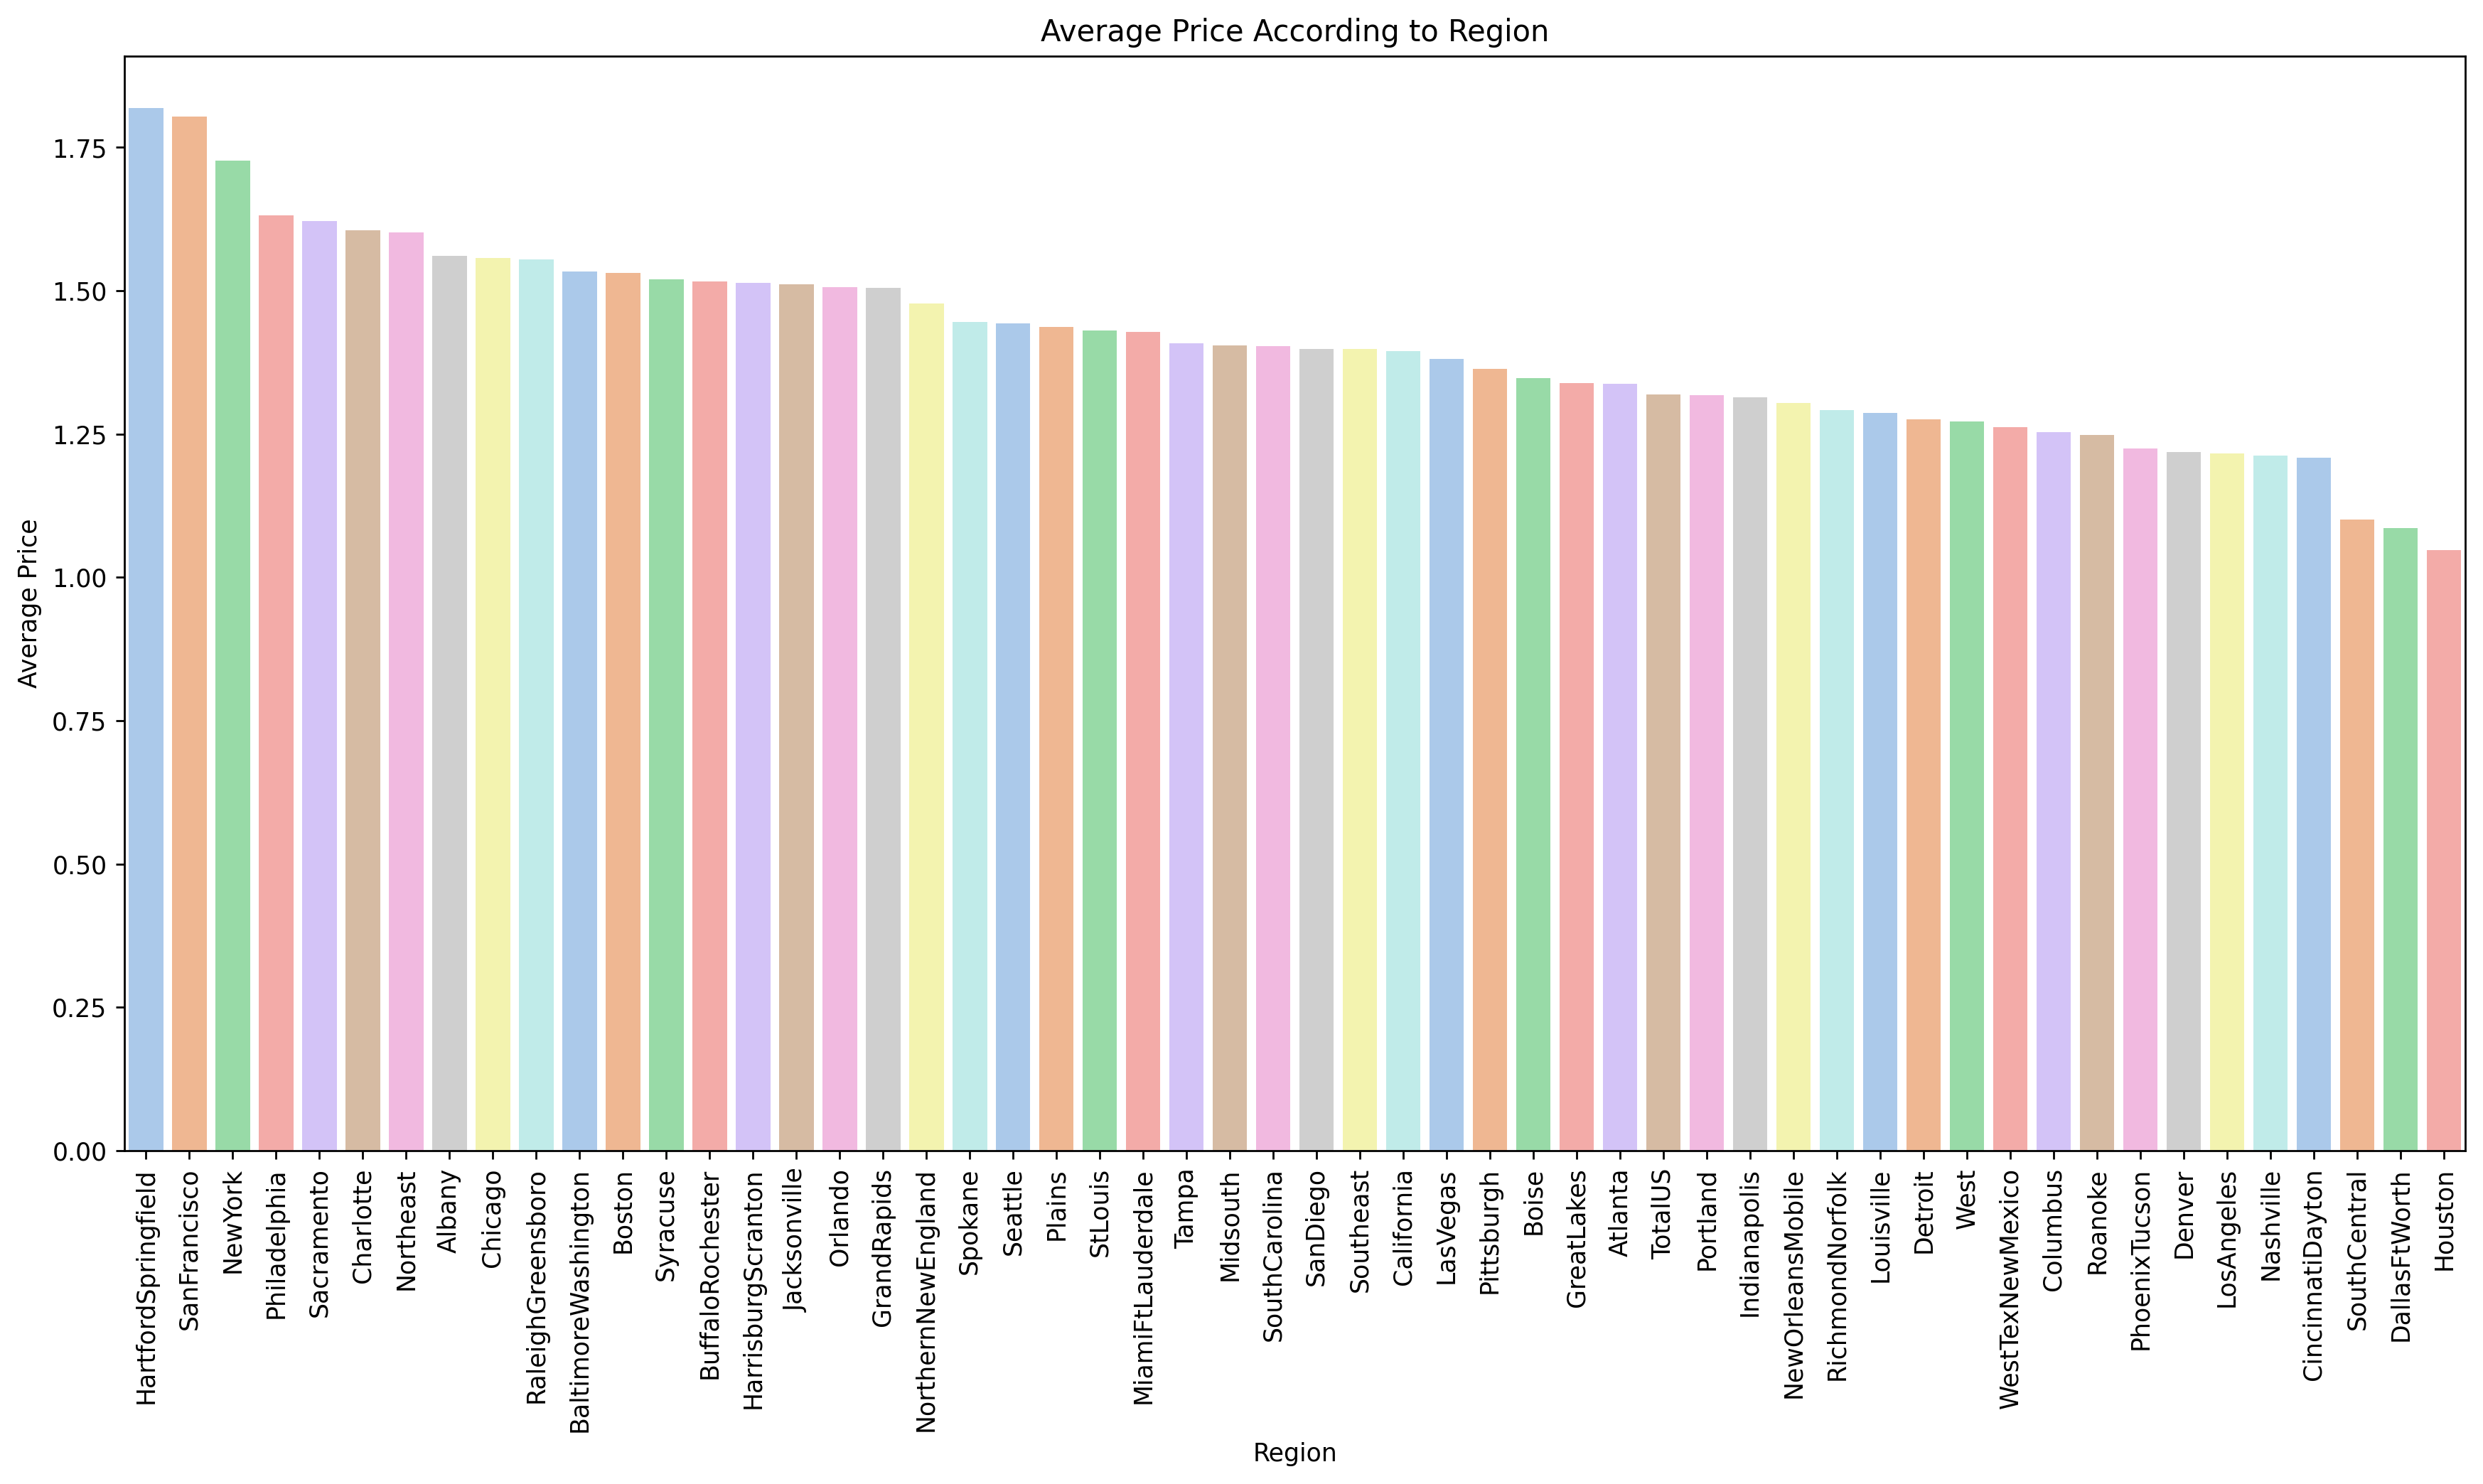

In [29]:
import seaborn as sns

byRegion=dfRegression.groupby('region').mean()
byRegion.sort_values(by=['AveragePrice'], ascending=False, inplace=True)
plt.figure(figsize=(17,8),dpi=250)
sns.barplot(x = byRegion.index,y=byRegion["AveragePrice"],data = byRegion,palette='pastel')
plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Average Price')
plt.title('Average Price According to Region')

4. Checking the outliers

<Axes: >

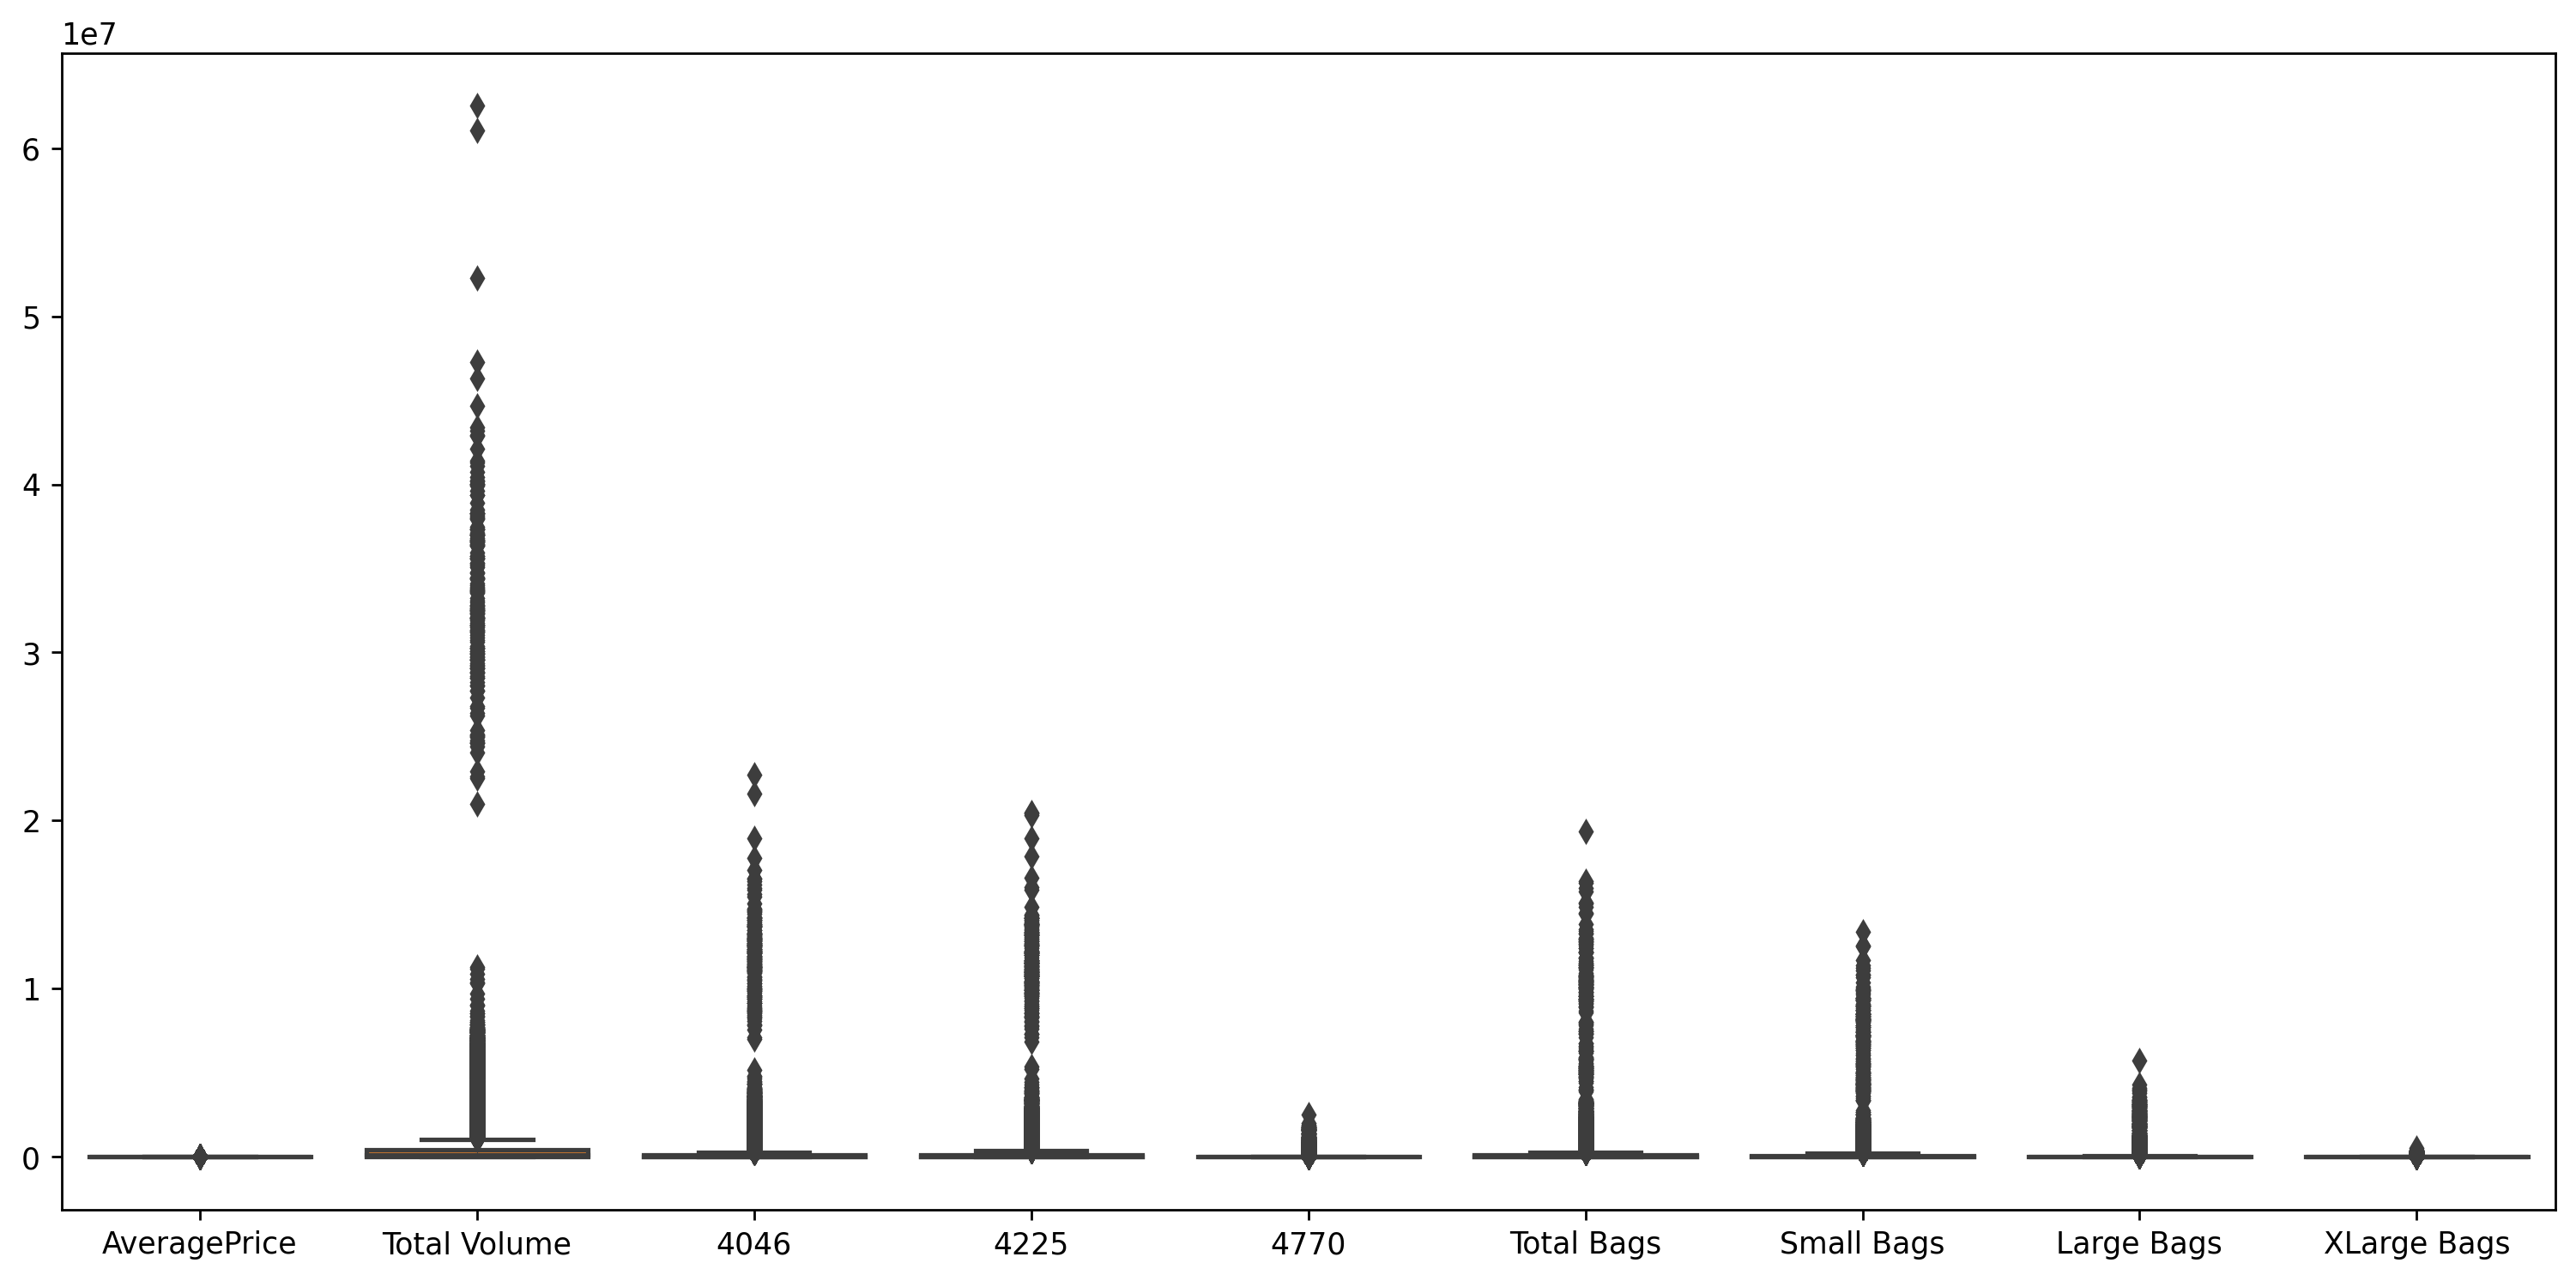

In [30]:
plt.figure(figsize=(15,7),dpi=250)
sns.boxplot(data = dfRegression[[
 'AveragePrice',
 'Total Volume',
 '4046',
 '4225',
 '4770',
 'Total Bags',
 'Small Bags',
 'Large Bags',
 'XLarge Bags']])

5. Diagram shows data has outliers therefore, we should take care of them.

In [31]:
import numpy as np
from numpy import percentile

columns = dfRegression.columns
for j in columns:
    if isinstance(dfRegression[j][0], str) :
        continue
    else:
        #defining quartiles
        quartiles = percentile(dfRegression[j], [25,75])
        # calculate min/max
        lower_fence = quartiles[0] - (1.5*(quartiles[1]-quartiles[0]))
        upper_fence = quartiles[1] + (1.5*(quartiles[1]-quartiles[0]))
        dfRegression[j] = dfRegression[j].apply(lambda x: upper_fence if x > upper_fence else (lower_fence if x < lower_fence else x))

<Axes: >

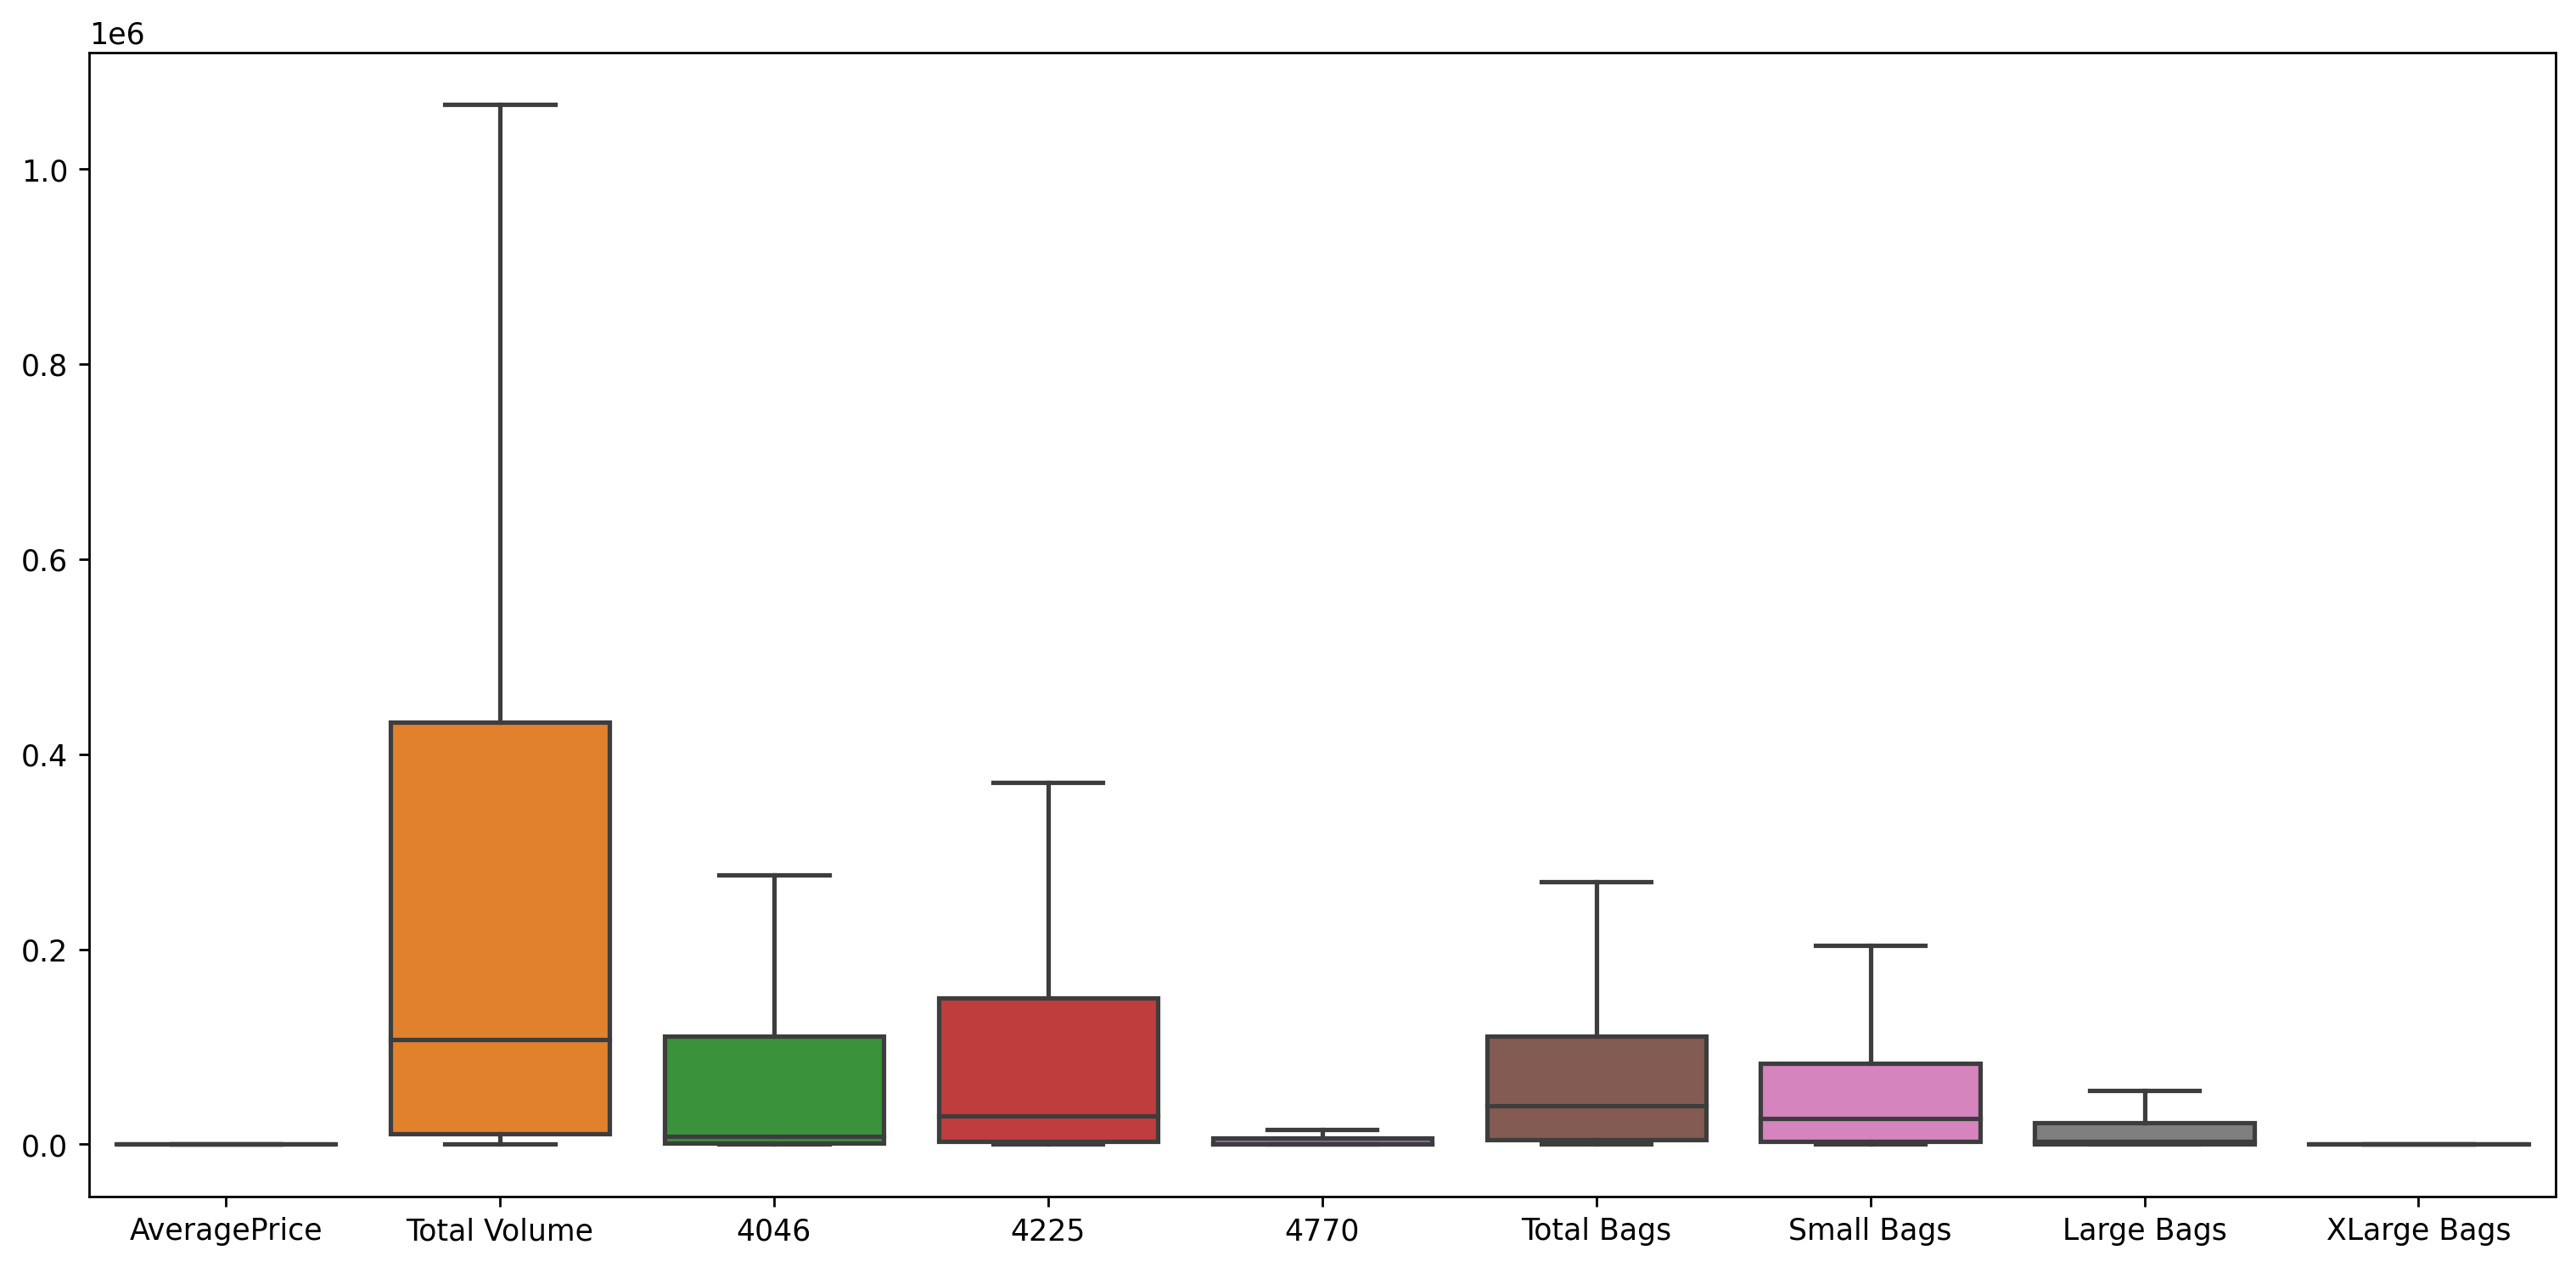

In [32]:
plt.figure(figsize=(15,7),dpi=250)
sns.boxplot(data = dfRegression[[
 'AveragePrice',
 'Total Volume',
 '4046',
 '4225',
 '4770',
 'Total Bags',
 'Small Bags',
 'Large Bags',
 'XLarge Bags']])

6. Treating categorical variables

In [33]:
# First Deleting useless columns
dfRegression.drop(columns=["Date"],inplace=True)
dfRegression.drop('Unnamed: 0',axis=1,inplace=True)
dfRegression

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,Albany,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,Albany,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,Albany,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,Albany,12,6
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,Albany,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1,2018,WestTexNewMexico,2,4
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1,2018,WestTexNewMexico,1,28
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1,2018,WestTexNewMexico,1,21
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1,2018,WestTexNewMexico,1,14


In [34]:
#Encoding them
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()
dfRegression['type']= label_encoder.fit_transform(dfRegression['type'])
dfRegression['Month']= label_encoder.fit_transform(dfRegression['Month'])
dfRegression['region']= label_encoder.fit_transform(dfRegression['region'])
dfRegression

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0,11,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0,11,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0,11,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0,11,6
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0,10,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1,2018,53,1,4
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1,2018,53,0,28
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1,2018,53,0,21
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1,2018,53,0,14


7. Model
    Splitting, Scaling, Fitting and Evaluating

In [35]:
import numpy as np
X=dfRegression.iloc[:,1:78]
y=dfRegression['AveragePrice']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=50)
y_test = np.array(y_test,dtype = float)

In [36]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

Price Prediction using linear regression

Mean Absolute Error: 0.21964464978991155
Mean Squared Error: 0.0807939748781573
R-squared: 0.5022169679600585


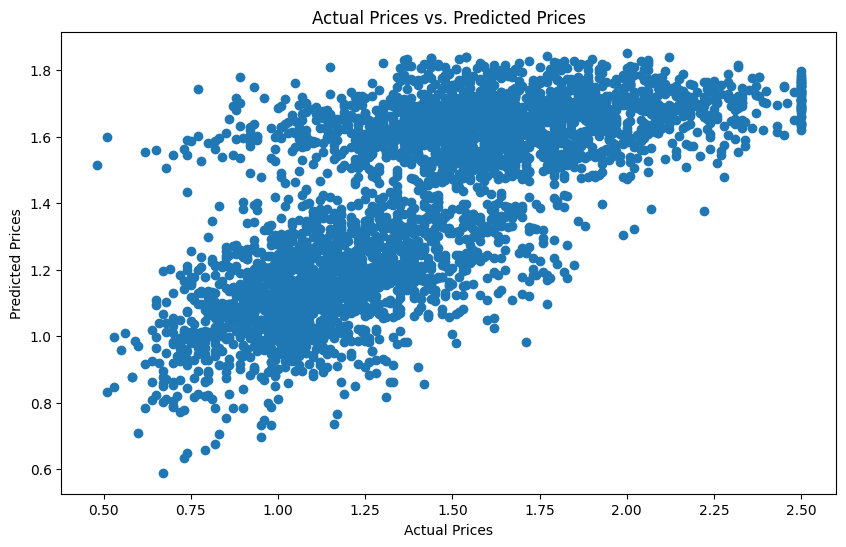

In [37]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

regressor=LinearRegression()
regressor.fit(X_train,y_train)
y_pred = regressor.predict(X_test)

mean_abs_error = mean_absolute_error(y_test, y_pred)
mean_sqr_error = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Absolute Error: {mean_abs_error}')
print(f'Mean Squared Error: {mean_sqr_error}')
print(f'R-squared: {r2}')
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs. Predicted Prices')
plt.show()


Prediction using Randon Forest Regression

In [38]:
from sklearn.ensemble import RandomForestRegressor

rf_regressor = RandomForestRegressor()
rf_regressor.fit(X_train, y_train)
y_pred_rf = rf_regressor.predict(X_test)

Mean Absolute Error: 0.0898
Mean Squared Error: 0.0158
R-squared: 0.9026


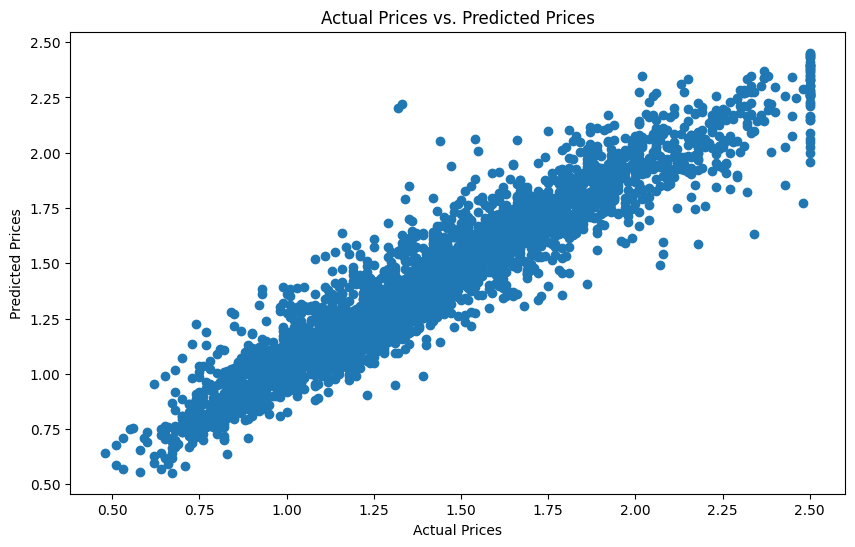

In [39]:
mae = mean_absolute_error(y_test, y_pred_rf)
mse = mean_squared_error(y_test, y_pred_rf)
r2 = r2_score(y_test, y_pred_rf)
print(f'Mean Absolute Error: {mae:.4f}')
print(f'Mean Squared Error: {mse:.4f}')
print(f'R-squared: {r2:.4f}')
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs. Predicted Prices')
plt.show()

Validating the scores of the models

In [44]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(rf_regressor, X_train, y_train, cv=5)

print("Cross-validated scores:", scores)

Cross-validated scores: [0.88422269 0.88438013 0.8784772  0.86992082 0.8844701 ]


  For the case of predicting prices the best algortihm is Random forest regression, because it gave better predictions and
  probably the linear models may be unable to adequately represent the data.
  
  Besides, Random forests are capable of capturing feature interactions this is the reason why is performing better than Linear Regression for our case.

# Prediction, Looking for where the best avocados prices are

1. Predicting prices for thw whole dataset not only training or test

In [ ]:
X_Prices=sc.fit_transform(X)
arrPredPrice = rf_regressor.predict(X_Prices)

2. Once we have the prices predicted, then we obtain the regions

In [ ]:

region=avocado_data['region']
region


0                  Albany
1                  Albany
2                  Albany
3                  Albany
4                  Albany
               ...       
18244    WestTexNewMexico
18245    WestTexNewMexico
18246    WestTexNewMexico
18247    WestTexNewMexico
18248    WestTexNewMexico
Name: region, Length: 18249, dtype: object

3. Joining the two arrays (regions and predicted prices) side by side

In [ ]:
arr = np.column_stack((region, arrPredPrice))
arr

array([['Albany', 1.3017999999999994],
       ['Albany', 1.3377999999999994],
       ['Albany', 1.0084000000000006],
       ...,
       ['WestTexNewMexico', 1.7362000000000009],
       ['WestTexNewMexico', 1.7803000000000027],
       ['WestTexNewMexico', 1.627300000000001]], dtype=object)

4. Converting the array into a dataset and renaming the columns

In [ ]:
dfPrectictedbyRegion = pd.DataFrame(arr)
dfPrectictedbyRegion = dfPrectictedbyRegion.rename(columns={0: 'region', 1: 'Predicted Price'})
dfPrectictedbyRegion

,region,Predicted Price
0,Albany,1.3018
1,Albany,1.3378
2,Albany,1.0084
3,Albany,1.1278
4,Albany,1.2619
...,...,...
18244,WestTexNewMexico,1.536
18245,WestTexNewMexico,1.6537
18246,WestTexNewMexico,1.7362
18247,WestTexNewMexico,1.7803


5. Plot prices and area on the graph to see where the cheapest avocados are

Text(0.5, 1.0, 'Predictes Price According to Region')

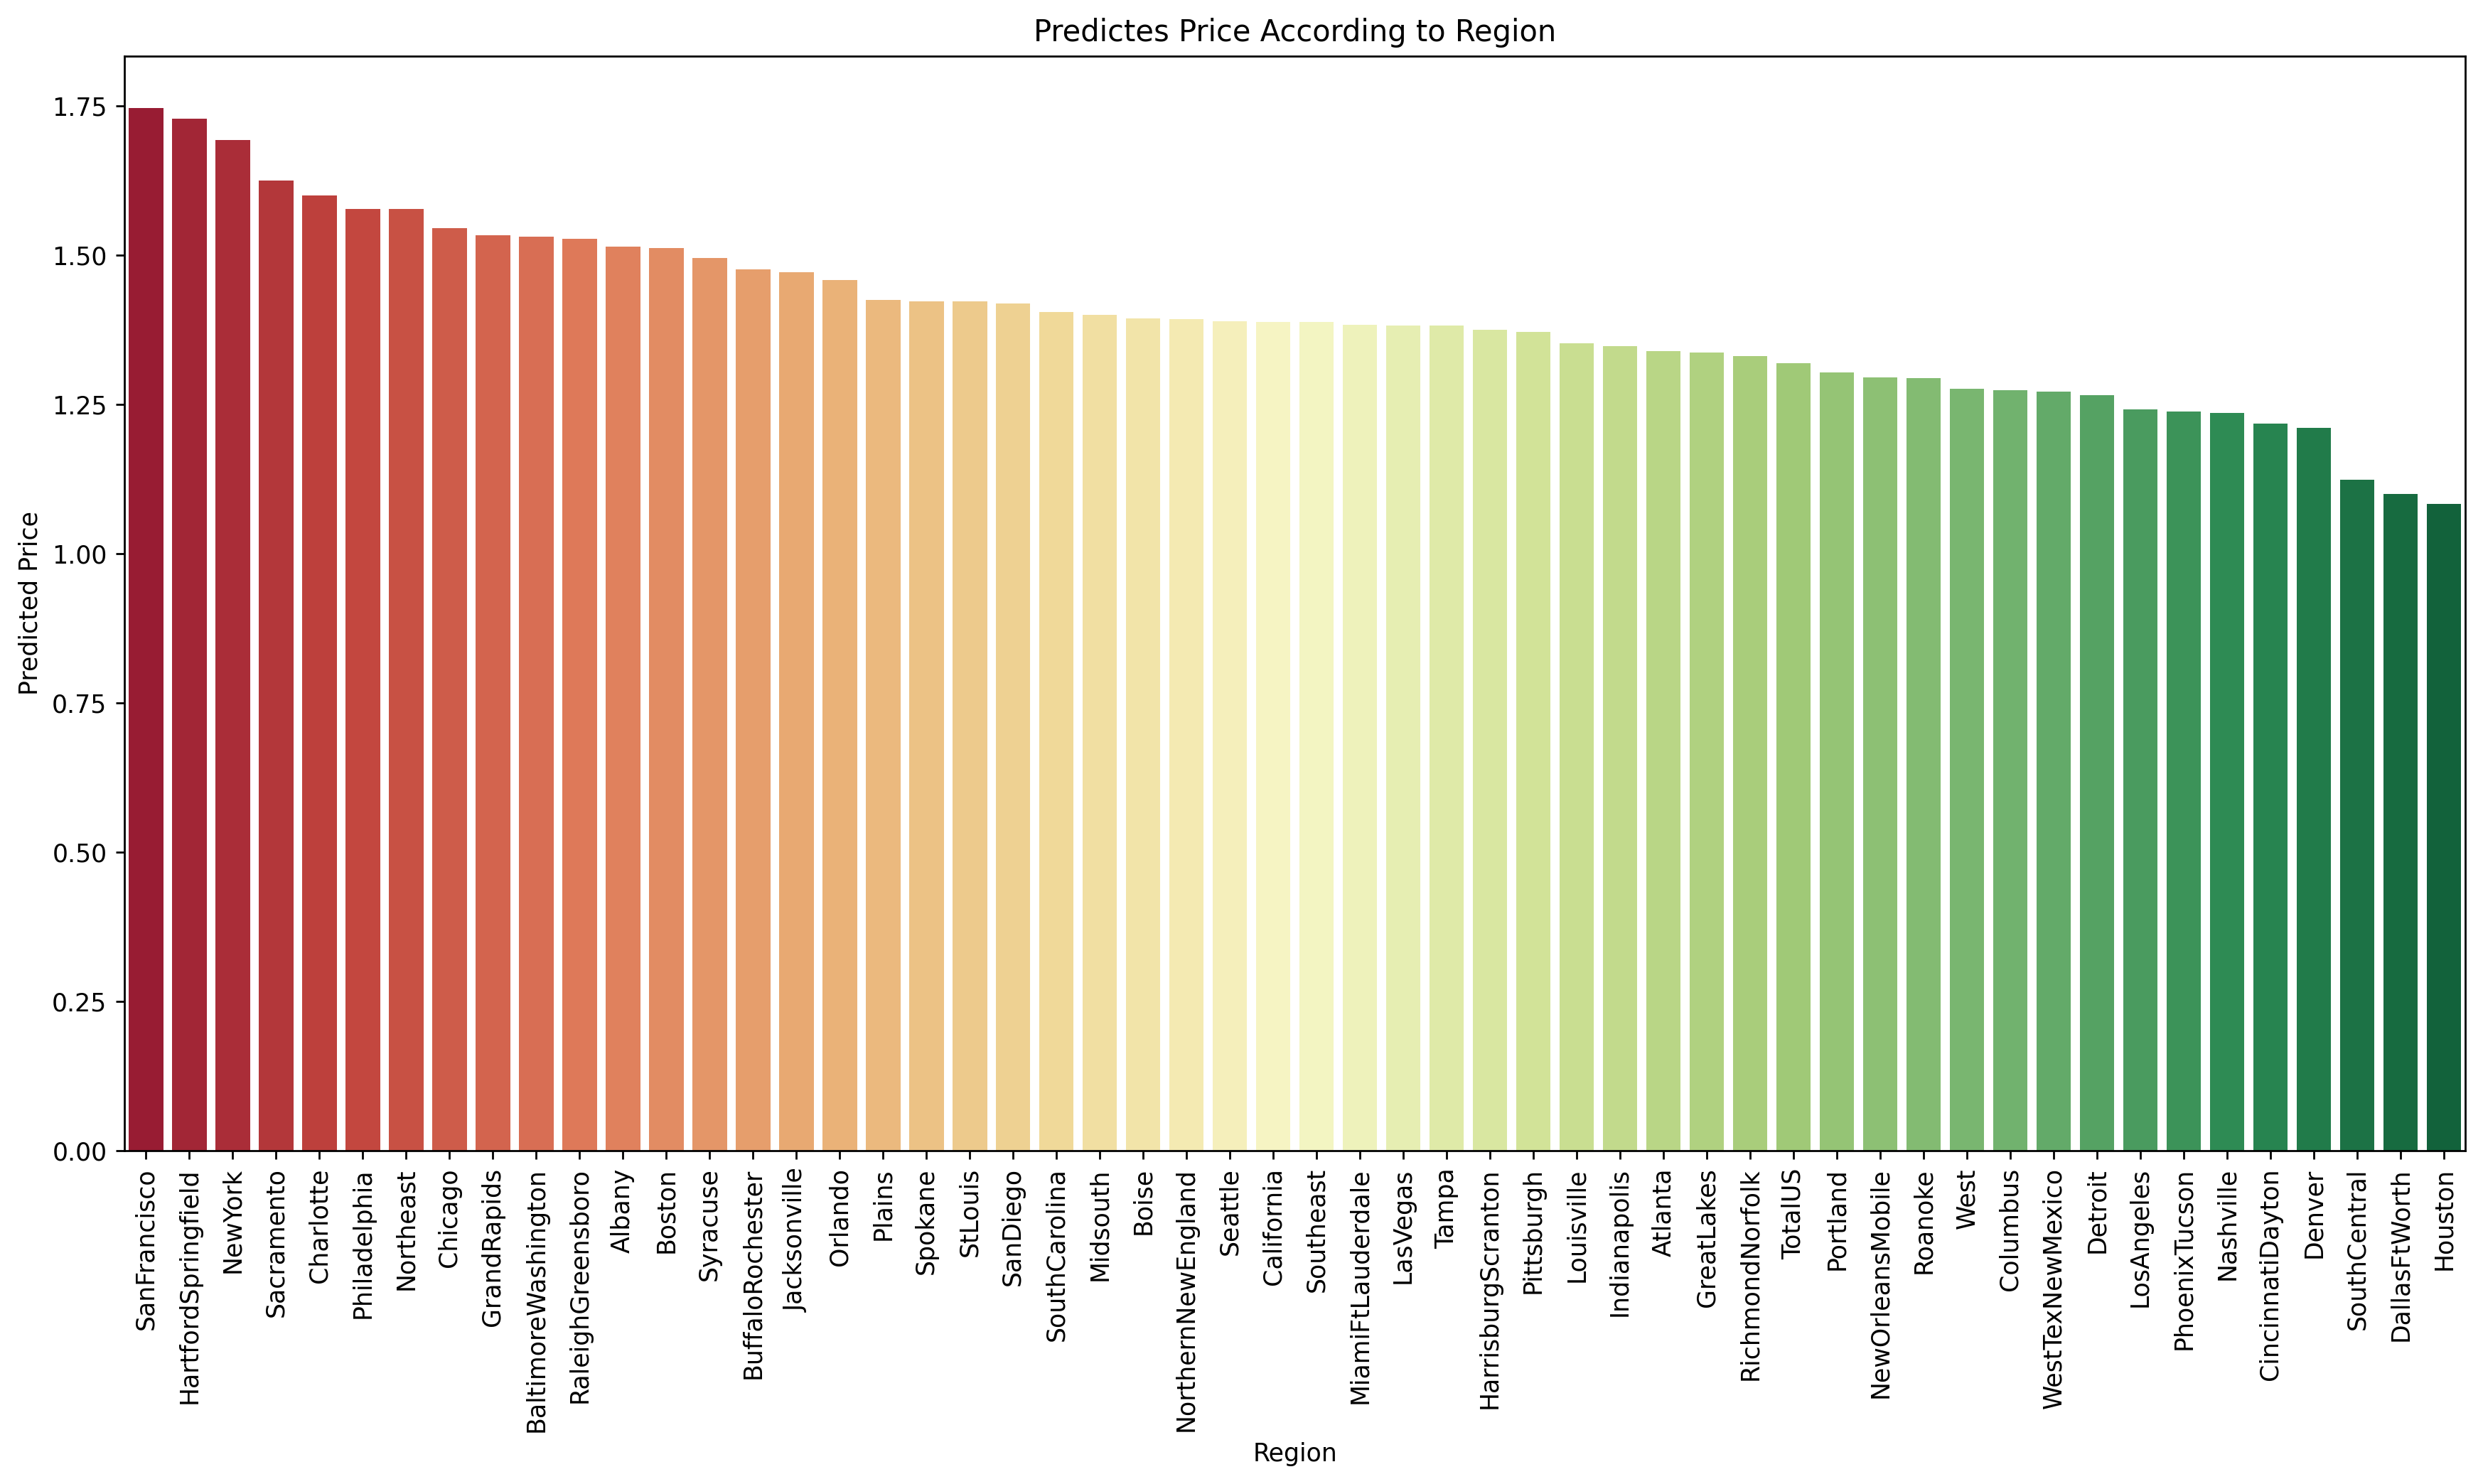

In [ ]:
byRegion=dfPrectictedbyRegion.groupby('region').mean()
byRegion.sort_values(by=['Predicted Price'], ascending=False, inplace=True)
plt.figure(figsize=(17,8),dpi=250)
sns.barplot(x = byRegion.index,y=byRegion['Predicted Price'],data = byRegion,palette='RdYlGn')
plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Predicted Price')
plt.title('Predictes Price According to Region')

# Conclusion
Based on the graph the cheapest avocados are found in Houston Tx, with a price close to 1.12, closely followed by Dallas FortWorth and the SouthCentral area.